### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading CSV 

In [5]:
#load the dataset
df = pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
df.shape

(8807, 12)

In [7]:
df.size

105684

### Dropping Columns

In [8]:
#df.isnull().sum()
#Clean the data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

### Movies vs TV Shows Distribution

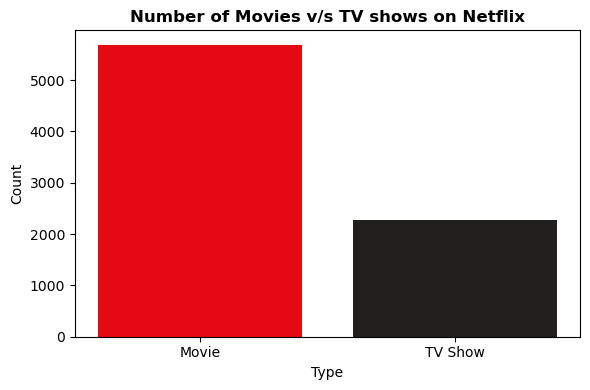

In [9]:
type_counts = df['type'].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_counts.index,type_counts.values,color=['#E50914','#221F1F'])
#type_counts is a Pandas Series
plt.title("Number of Movies v/s TV shows on Netflix",fontweight="bold")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshow.png")
plt.show()

> Netflix has a significantly higher number of **Movies** compared to **TV Shows**, indicating a stronger focus on movie content.

## Pie Chart ( How much content rating is distributed )

In [10]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

### Content Rating Distribution on Netflix

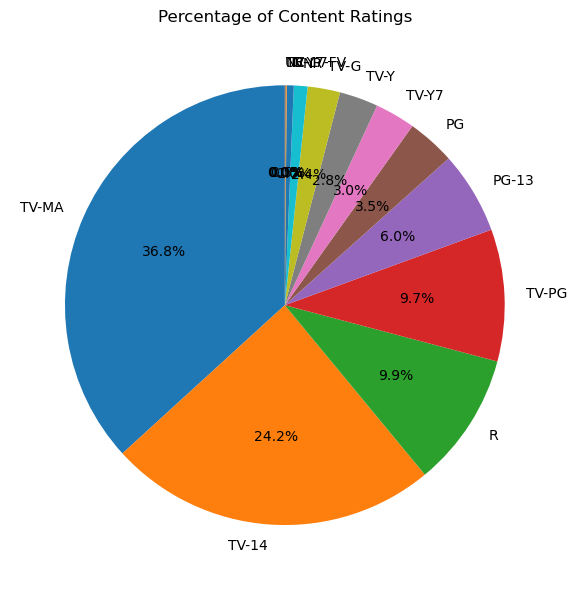

In [11]:
#how much content rating is distributed
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig("content_ratings_pie.png")
plt.show()

> The **TV-MA** and **TV-14** ratings dominate the platform, showing that most content is targeted toward mature and teenage audiences.

### Distribution of Movie Duration

In [12]:
movie_df = df[df['type']=="Movie"].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

avg_duration = np.mean(movie_df['duration_int'])
avg_duration


np.float64(100.51802356251099)

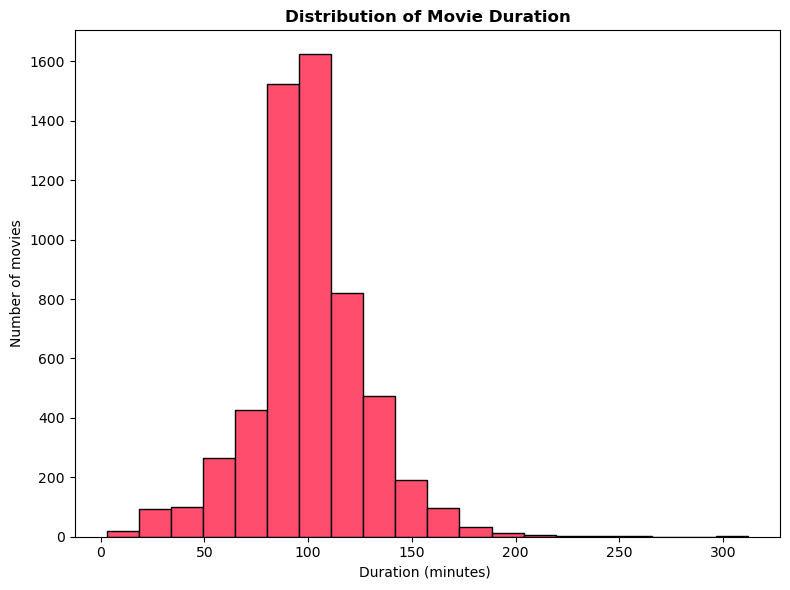

In [13]:
# movie duration how much distributed using histogram
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=20,color="#ff4d6d",edgecolor="black")
plt.title("Distribution of Movie Duration",fontweight="bold") 
plt.xlabel("Duration (minutes) ")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig("movie_duration_hist.png")
plt.show()

> Most movies on Netflix have a duration between **80 and 120 minutes**, which represents the standard movie length preferred by viewers.

### Scatter Plot ( Release Year vs Number of Shows )

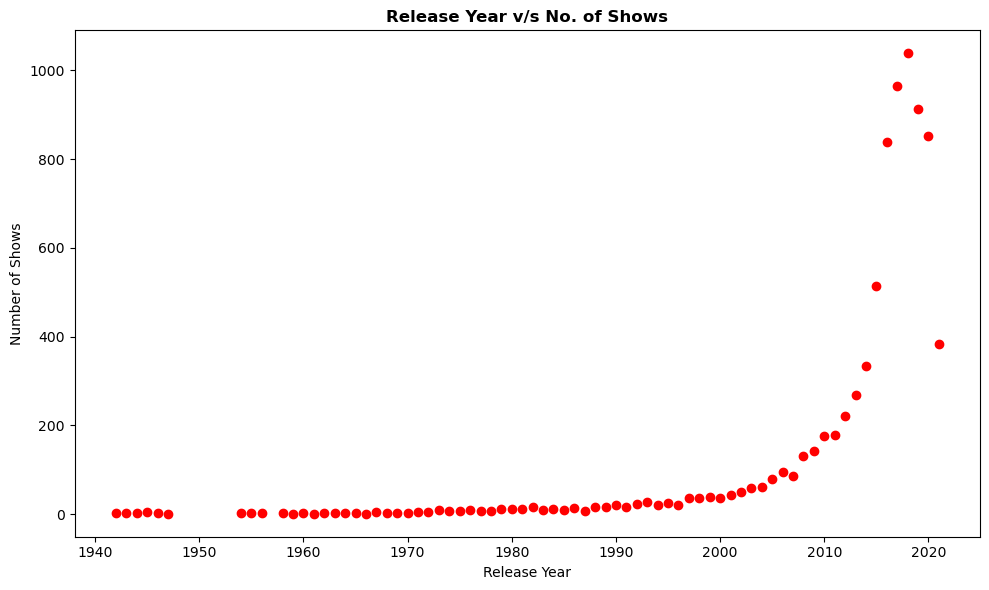

In [14]:
# Scatter plot  -> release year v/s no. of shows
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color="red")
plt.title("Release Year v/s No. of Shows",fontweight="bold")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

> Netflix content releases have increased rapidly in recent years, with a noticeable rise after **2015**.

### Horizontal Bar Chart ( Top 10 Countries by Number of Netflix Shows )

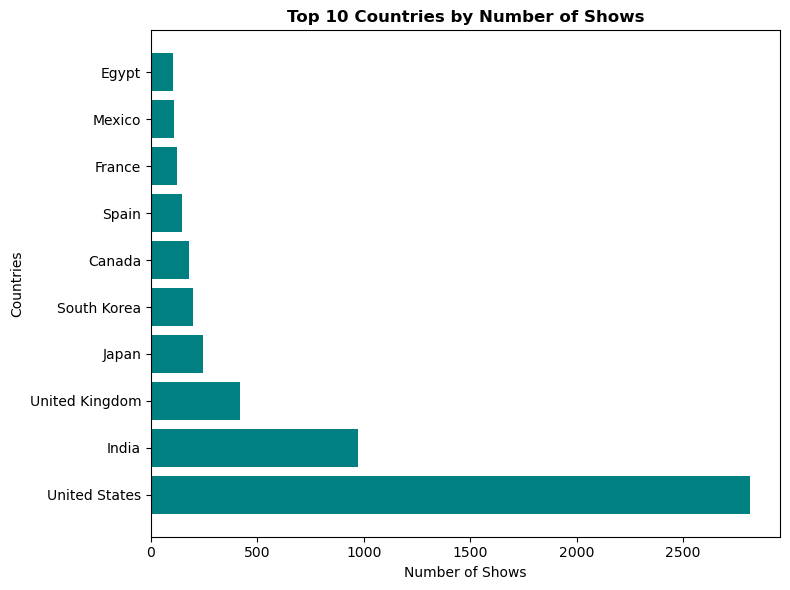

In [15]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color="teal")
plt.title("Top 10 Countries by Number of Shows",fontweight="bold")
plt.xlabel("Number of Shows")
plt.ylabel("Countries")
plt.tight_layout()
plt.savefig("top10_countries.png")
plt.show()


> The **United States** contributes the highest number of titles on Netflix, making it the leading content-producing country.

### Movies and TV Shows Released Over the Years

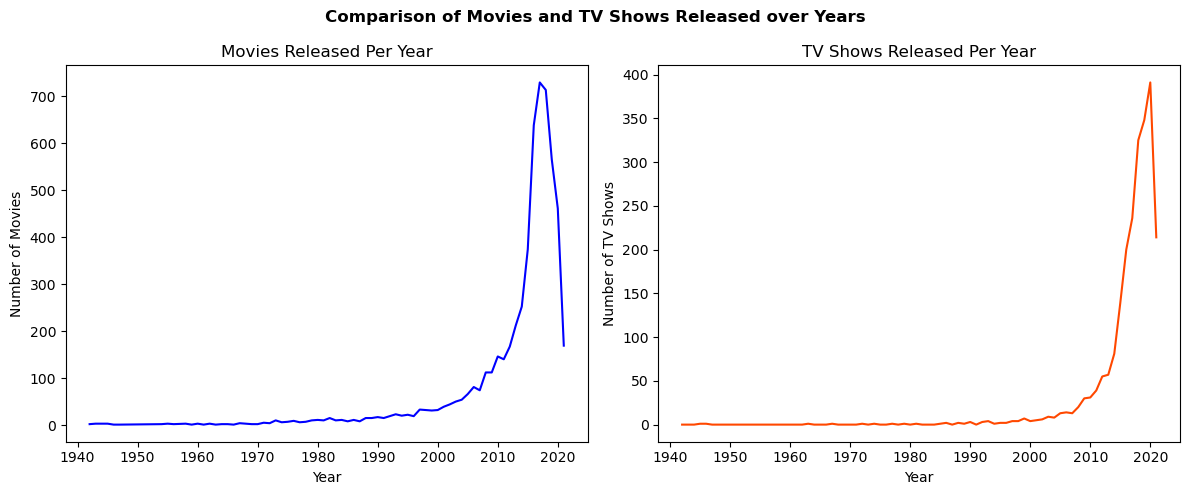

In [16]:
#movie v/s shows

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize=(12,5))
#first subplot is of movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

#2nd subplot is for TV shows
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='#ff4800')
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

fig.suptitle("Comparison of Movies and TV Shows Released over Years",fontweight="bold")

plt.tight_layout()
plt.savefig("movies_tv_shows_comparison.png")
plt.show()

> The trend indicates continuous growth in Netflix content production, where Movies dominate overall releases while TV Shows show a gradual but consistent rise.